### Bool mask and bool indexing

In [1]:
import pandas as pd
import numpy as np

In [2]:
floats  = pd.DataFrame(np.random.randn(7,4), columns =["A", "B", "C","D"])
floats

,A,B,C,D
0,0.312466,0.971517,-0.402862,0.457246
1,0.797360,0.662971,-0.882527,1.416694
2,1.782400,-1.412143,-1.258114,0.470810
3,0.443356,-0.272530,-0.249333,-0.846116
4,-1.809408,1.336828,0.508932,1.274788
5,0.896047,-1.185467,1.395656,1.565841
6,-0.914618,0.942485,0.855899,1.893913


In [21]:
# Creating bool mask for column "B"

floats["B"] >= 0        # Skriver ut uttrycket direkt med False/True värden om villkoret inte uppfylls/uppfylls, vanligast
                        # Man sparar alltså inte detta i något objekt


# Selecting all rows where "B" > = 0

floats[floats["B"] >= 0]   # sparar denna bool mask i lista


# Creating bool mask for row "0" 
floats.loc[0, :] >= 0   # Bool mask för rad 0 skapas utifrån villkoret som specificeras


# Selecting all columns where "0">= 0 
floats.loc[:, floats.loc[0, :] >= 0]   # Skriver ut alla rader men enbart kolumner som matchar uttrycket som är inlagt


# Varje rad är ett objekt, kolumnerna attribut. DÄRFÖR Ofta vill filtrera på raden enligt nedan i allra flesta fall:
# Alla studenter i en viss klass osv.

,A,B
0,0.209219,0.514129
1,1.245254,1.436637
2,-0.068006,-0.535780
3,1.176310,-0.068668
4,-0.874055,-0.732773
5,0.096321,0.994601
6,1.237909,-0.053209


## Querying data
Filtering rows based on values of certain attributes can be done either with bool indexing or pandas query method.
Filtrera ut alla rader/objekt som uppfyller visst villkor - attribut i kolumner, t.ex. viss student som går i en viss klass osv.


In [24]:
autos = pd.read_json("..\\Data\\autos.json")
autos.head(3)

,aspiration,body-style,bore,city-mpg,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,engine-type,...,make,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
0,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,13495.0,2.68,3,88.6,64.1
1,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,16500.0,2.68,3,88.6,64.1
2,std,hatchback,2.68,19,9.0,2823,rwd,front,152,ohcv,...,alfa-romero,NaN,six,two,5000.0,16500.0,3.47,1,94.5,65.5


In [35]:
autos[autos["make"] == "volvo"]

autos.query("make =='volvo'")   # samma, via query


autos[autos["engine-size"] <= 140 ]
autos.query("´engine-size´ <= 140")   # samma, via query , obs, vissa tecken går inte att skriva rakt av och behöver backticks


autos[(autos["make"] == "volvo") | autos["engine-size"] <= 140)]

autos[(autos["make"] == "volvo"] & autos[autos["engine-size"] <= 140 )]

# Så fort man har mer än ett villkor, blir query metoden mer lättläst. 

autos.query("make == 'volvo' and 'engine-size' <= 140")

# När man vill filtrera ut data såhär, det man får ut är nya dataframe.
# kan då skriva new_df = osv eller skicka den direkt till relplot
# Query nästan alltid enklare att använda. Enda fördelen med andra är att vi kan använda loc för att uppdatera.
# T.ex. vill vi uppdatera priset på volvo bilar med vissa vilkor så kan det sättet att skrivas användas (ej query)

autocopy = autos.copy()

autocopy.loc(autos["make"] == "volvo") & (autos["engine-size"] <= 140), ["price"]] = 0

# Boolmask och query två olika sätt att filtrera ut, kolla upp denna delen med honom igen. 



SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (3622128404.py, line 10)

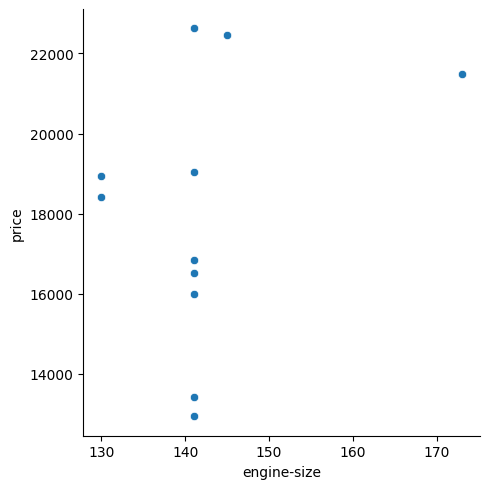

In [27]:
import seaborn as sns
# sns.relplot(x = "engine-size", y="price", data = autos)   # Obs för alla bilar

sns.relplot(x = "engine-size", y="price", data = autos[autos["make"] == "volvo"])     # Med boolmask för att plotta samma sak enbart för volvo


# sns.relplot(x = "engine-size", y="price", data = autos.query("make =='volvo'"))


## Sorting dataframe

Dataframes can be sorted using the .sort_values() method

Parameters:
-**by** Column, or list of columns
-**ascending** Optional. Default =True

In [40]:
autos.sort_values(by="engine-size")
autos.sort_values(by=["make", "engine-size"], ascending = [False, True])


# Kan även göras på flera kolumner.

,aspiration,body-style,bore,city-mpg,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,engine-type,...,make,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
198,turbo,sedan,3.62,17,7.5,3045,rwd,front,130,ohc,...,volvo,103.0,four,four,5100.0,18420.0,3.15,-2,104.3,67.2
199,turbo,wagon,3.62,17,7.5,3157,rwd,front,130,ohc,...,volvo,74.0,four,four,5100.0,18950.0,3.15,-1,104.3,67.2
194,std,sedan,3.78,23,9.5,2912,rwd,front,141,ohc,...,volvo,103.0,four,four,5400.0,12940.0,3.15,-2,104.3,67.2
195,std,wagon,3.78,23,9.5,3034,rwd,front,141,ohc,...,volvo,74.0,four,four,5400.0,13415.0,3.15,-1,104.3,67.2
196,std,sedan,3.78,24,9.5,2935,rwd,front,141,ohc,...,volvo,103.0,four,four,5400.0,15985.0,3.15,-2,104.3,67.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,std,sedan,3.19,19,8.5,2844,fwd,front,136,ohc,...,audi,158.0,five,four,5500.0,17710.0,3.40,1,105.8,71.4
7,std,wagon,3.19,19,8.5,2954,fwd,front,136,ohc,...,audi,NaN,five,four,5500.0,18920.0,3.40,1,105.8,71.4
0,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,13495.0,2.68,3,88.6,64.1
1,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,16500.0,2.68,3,88.6,64.1
